In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
dados = pd.read_csv('mapa2016_armas_UF8.csv', sep=',')
dados

,Município,UF,2012,2013,2014*,Pop. Mé-dia 12/14,Taxa Média,Pos. Nac.
0,Sena Madureira,AC,8,12,8,40.238,"23,2",1º
1,Rio Branco,AC,51,66,88,356.492,"19,2",2º
2,Brasiléia,AC,4,3,3,22.846,"14,6",3º
3,Acrelândia,AC,0,1,3,13.326,"10,0",4º
4,Porto Acre,AC,0,1,3,15.986,"8,3",5º
5,Senador Guiomard,AC,1,3,1,20.793,"8,0",6º
6,Cruzeiro do Sul,AC,9,5,2,80.383,"6,6",7º
7,Tarauacá,AC,2,2,2,37.512,"5,3",8º
8,Epitaciolândia,AC,1,1,0,16.065,"4,1",9º
9,Mâncio Lima,AC,0,0,2,16.365,"4,1",10º


Função para troca de tipos

In [144]:
def trocar_valores(coluna, c_old, c_new, tipo):
    soma = ''
    lista = []
    for i in dados[str(coluna)]:
        soma = ''
        for j in range(len(i)):
            if i[j] == c_old:
              soma += c_new
            else:
                soma += i[j]
        if tipo == 'float':
            lista.append(float(soma))
        else:
            lista.append(int(soma))
    dados[coluna] = lista

In [145]:
trocar_valores('Taxa Média', ',', '.', 'float')#Taxa Média convertida para float

In [146]:
trocar_valores('Pop. Mé-dia 12/14', '.', '', 'int')#Pop media convertida para inteiro

In [147]:
trocar_valores('Pos. Nac.', 'º', '', 'int')#Pos.Nacional convertida para inteiro

Dados por estado

In [148]:
PR = dados[dados['UF'] == 'PR']
SC = dados[dados['UF'] == 'SC']
RS = dados[dados['UF'] == 'RS']

In [149]:
GO = dados[dados['UF'] == 'GO']
MT = dados[dados['UF'] == 'MT']
MS = dados[dados['UF'] == 'MS']
DF = dados[dados['UF'] == 'DF']
GO = pd.concat([GO, DF])#Considerando Distrito federal pertencente a Goiás

Dados por estado ordenados de maneira geral,  do menor para o maior

In [150]:
pr_geral = PR.sort_values(['2012','2013','2014*'])
sc_geral = SC.sort_values(['2012','2013','2014*'])
rs_geral = RS.sort_values(['2012','2013','2014*'])

In [151]:
go_geral = GO.sort_values(['2012','2013','2014*'])
mt_geral = MT.sort_values(['2012','2013','2014*'])
ms_geral = MS.sort_values(['2012','2013','2014*'])

Estados com maior numero de ocorrencias nos anos 2012, 2013 e 2014

In [152]:
pr_geral = [pr_geral.loc[pr_geral.index[-1]]]
sc_geral = [sc_geral.loc[sc_geral.index[-1]]]
rs_geral = [rs_geral.loc[rs_geral.index[-1]]]

In [153]:
go_geral = [go_geral.loc[go_geral.index[-1]]]
mt_geral = [mt_geral.loc[mt_geral.index[-1]]]
ms_geral = [ms_geral.loc[ms_geral.index[-1]]]

Convertendo os dados para dataframe

In [154]:
pr = pd.DataFrame(pr_geral)
sc = pd.DataFrame(sc_geral)
rs = pd.DataFrame(rs_geral)

In [155]:
go = pd.DataFrame(go_geral)
mt = pd.DataFrame(mt_geral)
ms = pd.DataFrame(ms_geral)

Dados organizados por regiões, remoção de dados desnecessarios

In [156]:
sul_geral = pd.concat([pr, sc, rs])
sul_geral.drop('UF', axis= 1, inplace=True)
sul_geral.drop('Pos. Nac.', axis= 1, inplace=True)
sul_geral.drop('Taxa Média', axis= 1, inplace=True)
sul_geral.drop('Pop. Mé-dia 12/14', axis= 1, inplace=True)

In [157]:
centro_oeste_geral = pd.concat([go, mt, ms])
centro_oeste_geral.drop('UF', axis= 1, inplace=True)
centro_oeste_geral.drop('Pos. Nac.', axis= 1, inplace=True)
centro_oeste_geral.drop('Taxa Média', axis= 1, inplace=True)
centro_oeste_geral.drop('Pop. Mé-dia 12/14', axis= 1, inplace=True)

Função para mudar consertar dataframe

In [158]:
def set_index_reg(reg):
    inde = []
    dados_12 = []
    dados_13 = []
    dados_14 = []
    for i in reg['2012']:
        dados_12.append(i)
    for i in reg['2013']:
        dados_13.append(i)
    for i in reg['2014*']:
        dados_14.append(i)
    for i in reg['Município']:
        inde.append(i)

    reg_data = pd.DataFrame({
                       '2012' : dados_12,
                       '2013' : dados_13,
                       '2014' : dados_14}, index=inde)
    return reg_data

In [159]:
sul_G = set_index_reg(sul_geral)
sul_G

,2012,2013,2014
Curitiba,587,537,583
Joinville,59,53,70
Porto Alegre,497,468,577


In [160]:
centro_oeste_G = set_index_reg(centro_oeste_geral)
centro_oeste_G

,2012,2013,2014
Brasília,786,656,705
Cuiabá,168,156,197
Campo Grande,100,81,110


Grafico comparando numero de ocorrencia das duas regiões

Text(0, 0.5, 'Quantidade de Haf')

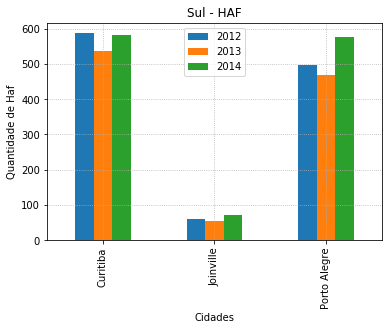

In [161]:
sul_G.plot.bar()
plt.grid(ls=':')
plt.title("Sul - HAF")
plt.xlabel("Cidades")
plt.ylabel("Quantidade de Haf")

Text(0, 0.5, 'Quantidade de Haf')

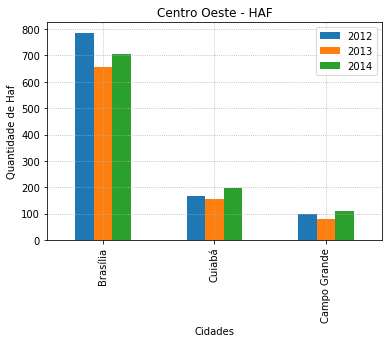

In [163]:
centro_oeste_G.plot.bar()
plt.grid(ls=':')
plt.title("Centro Oeste - HAF")
plt.xlabel("Cidades")
plt.ylabel("Quantidade de Haf")